### Time Series

In [1]:
# API Key: X52C6WXGE1OSAM0G

In [2]:
import json
import requests
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TD&outputsize=full&apikey=X52C6WXGE1OSAM0G'
resp = requests.get(url)
resp.json()["Meta Data"]

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'TD',
 '3. Last Refreshed': '2021-04-01',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [4]:
df = pd.DataFrame(resp.json()['Time Series (Daily)'])

In [5]:
df.head()

,2021-04-01,2021-03-31,2021-03-30,2021-03-29,2021-03-26,2021-03-25,2021-03-24,2021-03-23,2021-03-22,2021-03-19,...,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,65.19,65.37,65.57,65.5,65.54,64.87,64.94,65.34,65.72,66.23,...,23.88,23.62,22.94,22.94,22.88,23.19,22.94,23.0,22.81,23.06
2. high,65.745,65.8,65.66,65.84,65.95,65.25,65.58,65.66,65.85,66.23,...,24.06,23.75,23.69,23.12,23.12,23.31,23.06,23.06,22.94,23.19
3. low,65.07,65.07,65.3,65.25,65.45,64.62,64.89,64.82,65.13,65.28,...,23.81,23.5,22.88,22.88,22.69,22.62,22.38,22.69,22.5,22.81
4. close,65.74,65.21,65.44,65.54,65.93,65.09,64.91,64.93,65.58,65.82,...,24.06,23.69,23.5,23.0,22.94,22.88,22.38,22.81,22.94,22.88
5. adjusted close,65.74,65.21,65.44,65.54,65.93,65.09,64.91,64.93,65.58,65.82,...,4.91688822026,4.84127522601,4.80244693167,4.70026720972,4.68800564309,4.67574407646,4.5735643545,4.66143891538,4.68800564309,4.67574407646


In [6]:
pd.to_datetime(df.columns)
df_transposed = df.transpose().set_index(df.columns)

In [7]:
df_transposed.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-04-01,65.19,65.745,65.07,65.74,65.74,1250288,0.0000,1.0
2021-03-31,65.37,65.8,65.07,65.21,65.21,1934835,0.0000,1.0
2021-03-30,65.57,65.66,65.3,65.44,65.44,1567541,0.0000,1.0
2021-03-29,65.5,65.84,65.25,65.54,65.54,1190930,0.0000,1.0
2021-03-26,65.54,65.95,65.45,65.93,65.93,1304748,0.0000,1.0


In [8]:
df_transposed.drop(columns=['1. open','2. high', '3. low', '4. close','7. dividend amount','8. split coefficient'],inplace=True)

In [9]:
df_transposed.head()

,5. adjusted close,6. volume
2021-04-01,65.74,1250288
2021-03-31,65.21,1934835
2021-03-30,65.44,1567541
2021-03-29,65.54,1190930
2021-03-26,65.93,1304748


In [10]:
df_transposed['5. adjusted close'] = df_transposed['5. adjusted close'].astype(float)
df_transposed['6. volume'] = df_transposed['6. volume'].astype(float)

In [11]:
df_transposed.sort_index(ascending=True,inplace=True)

In [12]:
df_transposed.index = pd.to_datetime(df_transposed.index)

In [13]:
df_weekly = df_transposed.resample('W').mean()
df_monthly = df_transposed.resample('M').mean()
df_quart = df_transposed.resample('Q-NOV').mean()
df_annual = df_transposed.resample('A-NOV').mean()

In [14]:
df_weekly.head()

,5. adjusted close,6. volume
1999-11-07,4.654899,113480.0
1999-11-14,4.789777,99540.0
1999-11-21,5.057488,165860.0
1999-11-28,4.984327,89875.0
1999-12-05,4.994136,106880.0


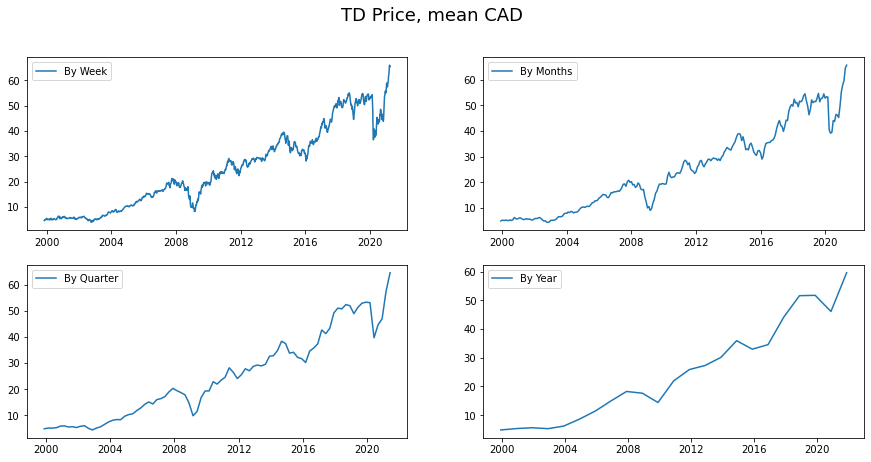

In [15]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('TD Price, mean CAD', fontsize=18)

plt.subplot(221)
plt.plot(df_weekly['5. adjusted close'], '-', label='By Week')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly['5. adjusted close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quart['5. adjusted close'], '-', label='By Quarter')
plt.legend()

plt.subplot(224)
plt.plot(df_annual['5. adjusted close'], '-', label='By Year')
plt.legend()

# plt.tight_layout()
plt.show()